# Convolutional Neural Network

In [4]:
!pip install --upgrade tensorflow

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = './cat&dog/training_set/training_set/'
test_dir = './cat&dog/test_set/test_set/'

img_size=(150,150)
batch_size=32
train_datagen = ImageDataGenerator(
rescale = 1./255,
shear_range = 0.2,
zoom_range=0.2,
horizontal_flip=True
)

test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
train_dir,
target_size=img_size,
batch_size=batch_size,
class_mode='binary'
)
test_generator=test_datagen.flow_from_directory(
test_dir,
target_size=img_size,
batch_size=batch_size,
class_mode='binary'
)

model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))


model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


epochs=8
model.fit(train_generator,epochs=epochs,validation_data=test_generator)


model.save('cnn_cat_vs_dog.h5')

Found 8005 images belonging to 2 classes.
Found 2024 images belonging to 2 classes.


C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/8


C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


251/251 ━━━━━━━━━━━━━━━━━━━━ 173s 674ms/step - accuracy: 0.5366 - loss: 0.7203 - val_accuracy: 0.6729 - val_loss: 0.6185
Epoch 2/8
251/251 ━━━━━━━━━━━━━━━━━━━━ 145s 570ms/step - accuracy: 0.6640 - loss: 0.6229 - val_accuracy: 0.7154 - val_loss: 0.5595
Epoch 3/8
251/251 ━━━━━━━━━━━━━━━━━━━━ 150s 591ms/step - accuracy: 0.7110 - loss: 0.5575 - val_accuracy: 0.7485 - val_loss: 0.5152
Epoch 4/8
251/251 ━━━━━━━━━━━━━━━━━━━━ 147s 577ms/step - accuracy: 0.7450 - loss: 0.5194 - val_accuracy: 0.7905 - val_loss: 0.4800
Epoch 5/8
251/251 ━━━━━━━━━━━━━━━━━━━━ 147s 578ms/step - accuracy: 0.7708 - loss: 0.4830 - val_accuracy: 0.7935 - val_loss: 0.4590
Epoch 6/8
251/251 ━━━━━━━━━━━━━━━━━━━━ 147s 579ms/step - accuracy: 0.8086 - loss: 0.4364 - val_accuracy: 0.7999 - val_loss: 0.4390
Epoch 7/8
251/251 ━━━━━━━━━━━━━━━━━━━━ 151s 595ms/step - accuracy: 0.8042 - loss: 0.4282 - val_accuracy: 0.7950 - val_loss: 0.4693
Epoch 8/8
251/251 ━━━━━━━━━━━━━━━━━━━━ 159s 628ms/step - accuracy: 0.8149 - loss: 0.4047 - va

In [3]:
model.save('cnn_cat_vs_dog.keras')

In [5]:
model.evaluate(test_generator)

64/64 [==============================] - 10s 149ms/step - loss: 0.4578 - accuracy: 0.7900


[0.4577816426753998, 0.7900197505950928]

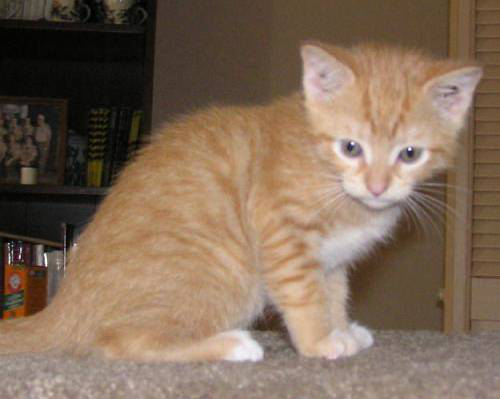

1/1 [==============================] - 0s 88ms/step
The image is predicted to be a cat


In [19]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from PIL import  Image
import numpy as np
from IPython.display import display

model = load_model('./cnn_cat_vs_dog.keras')

def preprocess_image(img_path):
    try:
        img=image.load_img(img_path,target_size=(150,150))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array,axis=0)
        img_array/=255.0
        return img_array
    
    except Exception as e:
        print(f"Error Processing Image: {e}")
        return None
    
def is_valid_image(img_path):
    return('cat' in img_path.lower() or 'dog' in img_path.lower())

test_image_path = './cat&dog/test_set/test_set/cats/cat.4003.jpg'

if is_valid_image(test_image_path):
    img = Image.open(test_image_path)
    display(img)
    
    processed_image = preprocess_image(test_image_path)
    
    if preprocess_image is not None:
        predictions = model.predict(processed_image)
        
        confidence_threshold = 0.7
        
        class_label = "Dog" if predictions[0,0] > confidence_threshold else "cat"
        print(f"The image is predicted to be a {class_label}")
    else:
        print(f"Invalid Image. please upload a valid image.")
else: 
    img = Image.open(test_image_path)
    display(img)
    print(f"Invalid Image. please upload a valid image Containing a cat and a dog.")

In [21]:
pip show tensorflow

Name: tensorflowNote: you may need to restart the kernel to use updated packages.

Version: 2.15.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: C:\Users\ASUS\anaconda3\Lib\site-packages
Requires: tensorflow-intel
Required-by: 
